In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load Data

In [2]:
df = pd.read_csv("../../../Data/Housing.csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Preperation

## Converting data into trainable format

In [7]:
yn_map = {"yes": 1, "no": 0}

for col in [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]:
    df[col] = df[col].map(yn_map)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## Handling `furnishingstatus` column

In [9]:
"""
- Not assigning 0, 1, 2 to strings because it adds a comparison
- instead adding columns for each of the string values, and 0 & 1 if that value is in original row or not
- removing one column because sum of all columns = 1, if we know values of n-1 columns, we can get value of nth column
    (reducing 1 dimension)
"""

furnishingstatus = pd.get_dummies(
    df["furnishingstatus"], dtype=np.int64, drop_first=True
)
furnishingstatus.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [10]:
df = pd.concat([df, furnishingstatus], axis=1)
df.drop(["furnishingstatus"], axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Adding additional Columns

In [11]:
df["areaperbedroom"] = df["area"] / df["bedrooms"]
df["bbratio"] = df["bathrooms"] / df["bedrooms"]

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## Normalization

In [13]:
def normalise(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


df = df.apply(normalise)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


## Data splitting

In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [15]:
X = df[
    [
        "area",
        "bedrooms",
        "bathrooms",
        "stories",
        "mainroad",
        "guestroom",
        "basement",
        "hotwaterheating",
        "airconditioning",
        "parking",
        "prefarea",
        "semi-furnished",
        "unfurnished",
        "areaperbedroom",
        "bbratio",
    ]
]

y = df["price"]

X.shape, y.shape

((545, 15), (545,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=377
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 15), (164, 15), (381,), (164,))

# Training

In [17]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm

In [18]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     57.36
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.18e-86
Time:                        10:11:51   Log-Likelihood:                 392.23
No. Observations:                 381   AIC:                            -752.5
Df Residuals:                     365   BIC:                            -689.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.059      1.171      0.242      -0.047       0.184
area                0.4161      0.124      3.348      0.001       0.172       0.661
bedrooms           -0.0474      0.090     -0.524      0.601      -0.225       0.130
bathrooms           0.2989      0.122      2.448      0.015       0.059       0.539
stories             0.1103      0.020      5.612      0.000       0.072       0.149
mainroad            0.0363      0.015      2.496      0.013       0.008       0.065
guestroom           0.0206      0.013      1.594      0.112      -0.005       0.046
basement            0.0459      0.011      4.219      0.000       0.025       0.067
hotwaterheating     0.0542      0.022      2.442      0.015       0.011       0.098
airconditioning     0.0847      0.011      7.717      0.000       0.063       0.106
parking             0.0613      0.017      3.528      0.000       0.027       0.095
prefarea            0.0568      0.012      4.904      0.000       0.034       0.080
semi-furnished     -0.0019      0.012     -0.161      0.872      -0.025       0.021
unfurnished        -0.0300      0.013     -2.366      0.019      -0.055      -0.005
areaperbedroom     -0.1059      0.148     -0.715      0.475      -0.397       0.185
bbratio            -0.0534      0.101     -0.529      0.597      -0.252       0.145
==============================================================================
Omnibus:                       66.025   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.872
Skew:                           0.855   Prob(JB):                     7.08e-36
Kurtosis:                       5.697   Cond. No.                         81.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation

## VIF (Variance Inflation Factor)

In [19]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns=["Var", "Vif"])
    x_vars = input_data.drop([dependent_col], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y, x).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by="Vif", axis=0, ascending=False, inplace=False)

In [20]:
vif_cal(df, dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


# VIF is very high and P value is also high for many columns, so, keep removing columns with highest P value and VIF value > 5

## Dropping bbratio

In [21]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train_sm.drop("bbratio", axis=1)

In [22]:
lm_2 = sm.OLS(y_train, X_train).fit()

In [23]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     61.55
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.56e-87
Time:                        10:11:51   Log-Likelihood:                 392.09
No. Observations:                 381   AIC:                            -754.2
Df Residuals:                     366   BIC:                            -695.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0448      0.037      1.196      0.232      -0.029       0.118
area                0.4460      0.111      4.031      0.000       0.228       0.664
bedrooms           -0.0157      0.068     -0.232      0.817      -0.149       0.117
bathrooms           0.2364      0.031      7.569      0.000       0.175       0.298
stories             0.1098      0.020      5.599      0.000       0.071       0.148
mainroad            0.0364      0.015      2.512      0.012       0.008       0.065
guestroom           0.0202      0.013      1.572      0.117      -0.005       0.046
basement            0.0455      0.011      4.197      0.000       0.024       0.067
hotwaterheating     0.0558      0.022      2.546      0.011       0.013       0.099
airconditioning     0.0848      0.011      7.739      0.000       0.063       0.106
parking             0.0610      0.017      3.516      0.000       0.027       0.095
prefarea            0.0577      0.011      5.041      0.000       0.035       0.080
semi-furnished     -0.0020      0.012     -0.172      0.864      -0.025       0.021
unfurnished        -0.0298      0.013     -2.359      0.019      -0.055      -0.005
areaperbedroom     -0.1406      0.133     -1.060      0.290      -0.401       0.120
==============================================================================
Omnibus:                       64.087   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.153
Skew:                           0.838   Prob(JB):                     3.36e-34
Kurtosis:                       5.628   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif_cal(input_data=df.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


## Dropping bedrooms

In [25]:
X_train = X_train.drop("bedrooms", axis=1)
lm_3 = sm.OLS(y_train, X_train).fit()
print(lm_3.summary())
vif_cal(input_data=df.drop(["bedrooms", "bbratio"], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     66.46
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.63e-88
Time:                        10:11:51   Log-Likelihood:                 392.06
No. Observations:                 381   AIC:                            -756.1
Df Residuals:                     367   BIC:                            -700.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0373      0.019     

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


## Dropping areaperbedroom

In [26]:
X_train = X_train.drop("areaperbedroom", axis=1)
lm_4 = sm.OLS(y_train, X_train).fit()
print(lm_4.summary())
vif_cal(
    input_data=df.drop(["bedrooms", "bbratio", "areaperbedroom"], axis=1),
    dependent_col="price",
)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     71.40
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.64e-88
Time:                        10:11:51   Log-Likelihood:                 390.58
No. Observations:                 381   AIC:                            -755.2
Df Residuals:                     368   BIC:                            -703.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0272      0.018     

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


## Dropping semi-furnished

In [27]:
X_train = X_train.drop("semi-furnished", axis=1)
lm_5 = sm.OLS(y_train, X_train).fit()
print(lm_5.summary())
vif_cal(
    input_data=df.drop(
        ["bedrooms", "bbratio", "areaperbedroom", "semi-furnished"], axis=1
    ),
    dependent_col="price",
)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     78.10
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.92e-89
Time:                        10:11:51   Log-Likelihood:                 390.58
No. Observations:                 381   AIC:                            -757.2
Df Residuals:                     369   BIC:                            -709.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0274      0.016     

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


## Dropping basement

In [28]:
X_train = X_train.drop("basement", axis=1)
lm_6 = sm.OLS(y_train, X_train).fit()
print(lm_6.summary())
vif_cal(
    input_data=df.drop(
        ["bedrooms", "bbratio", "areaperbedroom", "semi-furnished", "basement"], axis=1
    ),
    dependent_col="price",
)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     80.22
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.55e-86
Time:                        10:11:51   Log-Likelihood:                 381.20
No. Observations:                 381   AIC:                            -740.4
Df Residuals:                     370   BIC:                            -697.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0466      0.015     

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


# Prediction & Evaluation

In [29]:
X_test_m6 = sm.add_constant(X_test)
X_test_m6 = X_test_m6.drop(
    ["bedrooms", "bbratio", "areaperbedroom", "semi-furnished", "basement"], axis=1
)
y_pred_m6 = lm_6.predict(X_test_m6)

Text(0, 0.5, 'y_pred')

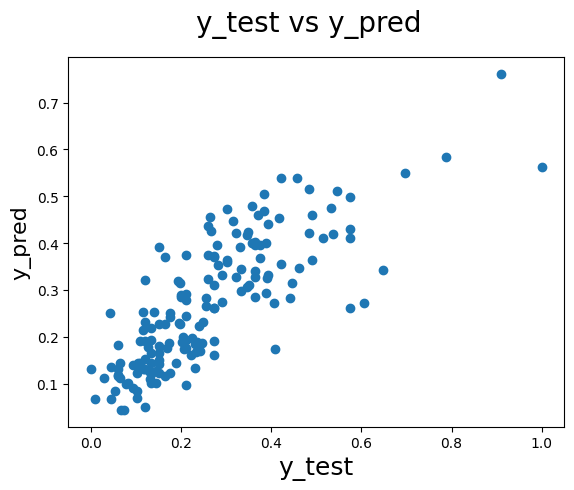

In [30]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle("y_test vs y_pred", fontsize=20)  # Plot heading
plt.xlabel("y_test", fontsize=18)  # X-label
plt.ylabel("y_pred", fontsize=16)  # Y-label

Text(0, 0.5, 'ytest-ypred')

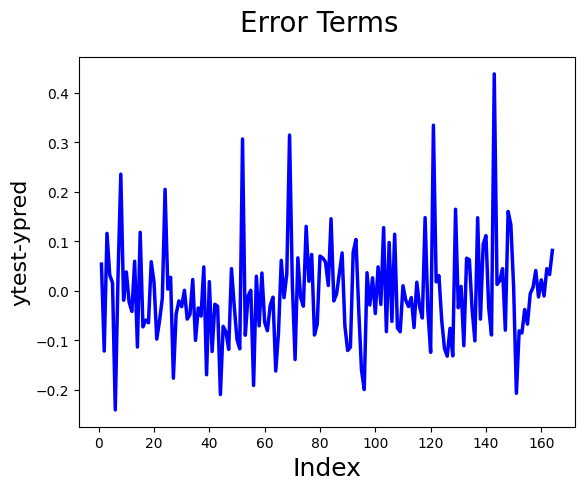

In [31]:
# Error terms
fig = plt.figure()
c = [i for i in range(1, 165, 1)]
plt.plot(c, y_test - y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=20)  # Plot heading
plt.xlabel("Index", fontsize=18)  # X-label
plt.ylabel("ytest-ypred", fontsize=16)  # Y-label

C:\Users\Dell\AppData\Local\Temp\ipykernel_28592\3963155455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_m6),bins=50)


Text(0, 0.5, 'Index')

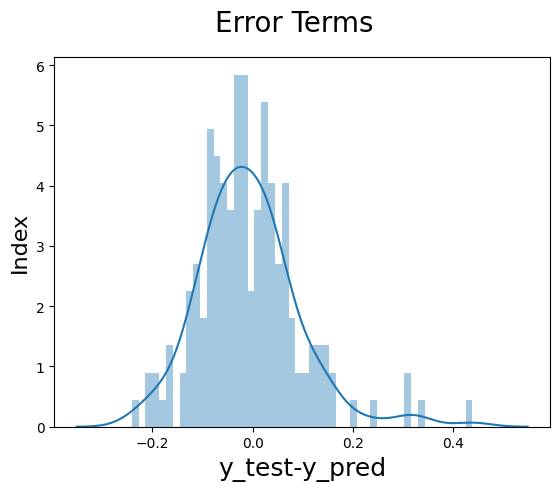

In [32]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test - y_pred_m6), bins=50)
fig.suptitle("Error Terms", fontsize=20)  # Plot heading
plt.xlabel("y_test-y_pred", fontsize=18)  # X-label
plt.ylabel("Index", fontsize=16)  # Y-label

In [33]:
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_m6)))

RMSE : 0.10156909309178914
